In [6]:
!pip install gensim

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [11]:
from db import db
import pandas as pd
import gensim
import re

In [16]:
data = db.read()

In [17]:
def copy_column(df):
    df['text'] = df['article_content']
    return df

def remove_puncs(df):
    rm = lambda x: re.sub('[,\.!?]', '', x)
    df['text'] = df['text'].map(rm)
    return df

def lowercase(df):
    lower = lambda x: x.lower()
    df['text'] = df['text'].map(lower)
    return df

data = data.pipe(copy_column).pipe(remove_puncs).pipe(lowercase)     

**This dataset contains a lot of fronend code, which makes it pretty dirty**

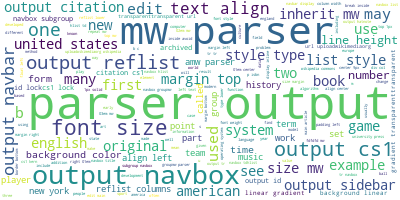

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

long_string = ','.join(list(data['text'].values))

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

In [25]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

list_data = data['text'].values.tolist()
data_words = list(sent_to_words(list_data))
data_words = remove_stopwords(data_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wanghuan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [60]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)

id2word.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

C:\Users\wanghuan\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
from pprint import pprint
# number of topics
num_topics = 8
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, iterations=200)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\wanghuan\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.013*"parser" + 0.012*"output" + 0.009*"english" + 0.008*"mw" + '
  '0.007*"american" + 0.006*"em" + 0.006*"book" + 0.005*"find" + '
  '0.005*"library" + 0.004*"edit"'),
 (1,
  '0.021*"output" + 0.018*"parser" + 0.011*"mw" + 0.011*"em" + 0.008*"navbox" '
  '+ 0.005*"margin" + 0.005*"font" + 0.005*"cs" + 0.004*"system" + '
  '0.004*"edit"'),
 (2,
  '0.011*"output" + 0.009*"parser" + 0.008*"mw" + 0.007*"english" + '
  '0.006*"retrieved" + 0.006*"american" + 0.006*"em" + 0.004*"navbox" + '
  '0.003*"new" + 0.003*"language"'),
 (3,
  '0.015*"output" + 0.015*"parser" + 0.012*"mw" + 0.008*"em" + 0.005*"navbox" '
  '+ 0.004*"isbn" + 0.004*"al" + 0.004*"left" + 0.004*"margin" + 0.003*"edit"'),
 (4,
  '0.028*"parser" + 0.026*"output" + 0.022*"mw" + 0.011*"em" + 0.006*"navbox" '
  '+ 0.005*"left" + 0.004*"padding" + 0.004*"displaystyle" + 0.004*"font" + '
  '0.004*"cs"'),
 (5,
  '0.008*"output" + 0.007*"parser" + 0.005*"displaystyle" + 0.005*"mw" + '
  '0.004*"em" + 0.004*"american" + 0

In [31]:
# !pip install pyLDAvis --user

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached https://mirrors.aliyun.com/pypi/packages/cd/1c/895001e29f870c4625a90af00895ef9c9f4f37b0a9b967d2ed810b7be0fc/funcy-1.17-py2.py3-none-any.whl (33 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl


In [58]:
import pickle 
import pyLDAvis
import os
from pyLDAvis import gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis_data)

C:\Users\wanghuan\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
